# [CP-113A] Analyzing the ACS 


---


### Professor: Sara Hinkley

Welcome to Analyzing the ACS! In this lab, we will introduce you to Jupyter Notebooks and the tools that you are going to use to conduct your data analysis of the American Community Survey (ACS). In the main part of this notebook, you will learn how to read tabular datasets, interpret data visualizations, and compare various economic indicators. By the end of this notebook, you will also apply your knowledge to answer a set of short answer questions.

Estimated Time: 1 Hour

---


## Table of Contents (TBD, will be updated later)

1. 

---

# Part 1: The Jupyter Notebook <a id='section 0'></a>

Before we start our lab, we want to give a brief introduction to Jupyter Notebooks (like this one) where you will work on conducting your survey analysis. 

**Jupyter notebooks** are documents that can contain a seamless compilation of text, code, visualizations, and more. A notebook is composed of two types of rectangular **cells**:  markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code. All of the code in this notebook is written in a programming language called **Python**. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys or by simply scrolling.

### 1.1 Run a cell <a id='subsection 0a'></a>
To run a code cell once it's been selected, 
- press `Shift` + `Enter`, or
- click the Run button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number corresponding to the order in which the cell was run will replace the asterisk and any output from the code will appear under the cell.

### 1.2 Editing a cell <a id='subsection 0c'></a>

**Question 1.2.1** You can edit a Markdown cell by clicking it twice. Text in Markdown cells is written in [**Markdown**](https://daringfireball.net/projects/markdown/), a formatting syntax for plain text, so you may see some funky symbols when you edit a text cell. Once you've made your changes, you can exit text editing mode by running the cell. 

**Task: Edit the next cell to fix the misspelling of the word, "survey."**

This is an analysis of economic survy data.

### 1.3 Saving and loading <a id='subsection 0d'></a>

#### Saving and Loading

Your notebook can record all of your text and code edits, as well as any graphs you generate or calculations you make. You can save the notebook in its current state by clicking `Control-S`/`Command-S`, clicking the **floppy disc icon** in the toolbar at the top of the page, or by navigating to **File > Save and Checkpoint** in the menu bar.

The next time you open the notebook, it will look the same as when you last saved it.

**Note:** After loading a notebook you will see all the outputs (graphs, computations, etc) from your last session, but you won't be able to use any variables you assigned or functions you defined. You can get the functions and variables back by re-running the cells where they were defined – the easiest way is to **highlight the cell where you left off work, then go to Cell > Run all above** in the menu bar. You can also use this menu to run all cells in the notebook by clicking **Run all**.

**Please run the cell below to load the modules we will be using throughout this notebook.**

In [53]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from utils import dollar_formatter
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Part 2: Understanding the Dataset

In this lab, we will be analyzing data from the American Community Survey (ACS). This is a sample survey of U.S. households, which asks questions about demographics, income, employment, education, and public assistance. 

*First, run the cell below to get an idea of what our dataset looks like*

In [54]:
acs_data = Table().read_table('fulldata_v2.csv')
acs_data.show(2)

Year,State,County,City,Ownership Status,Household Income,Foodstamp Recipient,Age,Race,Hispanic,Education Status,Employment Status,Part of Labor Force,Occupation,Industry,Type of Worker,Employment Sector,Hours worked per week,Pre-Tax Wages,Poverty Status
2007,California,"El Centro, CA",Not in identifiable city (or size group),Rented,15000,No,32,White,Hispanic,No HS,Employed,"Yes, in the labor force","Farming, Fishing","Agriculture, Hunting, Forestry",Works for wages,non-profit,40,15000,Near Poverty
2007,California,Not in identifiable area,Not in identifiable city (or size group),Owned or being bought (loan),72000,No,52,White,Not hispanic,Graduate,Employed,"Yes, in the labor force",Healthcare Practitioners,Health Care,Works for wages,private,45,70000,Non-Poverty


What you see above is a table which contains a random sample of every survey response from the ACS survey. Each row of the table represents *an individual, unique response*. Along the top of the table are the columns: these represent *the questions that the survey asks* respondents about.

Our dataset consists of two surveys of Californian residents, combined for the years 2007 and 2017. Our goal is to compare trends over time. 

<div class="alert alert-success">
<b>  Scroll through the table and write down any observations or questions you have </b> 
</div>

##### Double click this cell and write your answer here.

At the very bottom, notice that it tells us that ~360,000 rows have been omitted. This is because our dataset is really large. In fact, it's so large that it would be very difficult to visualize it in a single notebook! [1] 

This is why we turn to *computational analysis*. 

Instead of inspecting the data by hand, *we will write code to tell our computer to analyze the data* for us. In this notebook, we use tools like data visualizations to answer interesting questions based on our survey data. 

Here's a concrete example of the power of computation:

Question: What percentage of all survey respondents are Foodstamp Recipients?

Obviously, for a dataset with few entries, this would be pretty easy to answer. However, for our dataset of 360,000+ respondents, this would be very difficult to count by hand. However, with code, this is easy to answer! 

<div class="alert alert-success">
<b>  Run the cell below to calculate the percent of Foodstamp Recipients in our dataset. </b> 
</div>

In [55]:
print(str(np.round(acs_data.where('Foodstamp Recipient', 'Yes').num_rows/acs_data.num_rows, 4)*100) + '%')

5.76%


In *one line of code*, we were able to get an idea of the demographics of a large population- this is the power of computational analysis!


Now, let's delve into the data analysis.

# Part 3: Data Analysis

## A) Wages by industry and occupation

In this part, we will investigate trends in wages between various industries and occupations. First, we will examine wages, industry, and occupation separately, and then compare them against each other and other survey variables. 

**Run the cell below to load the relevant data sets.**

In [56]:
industry_2007 = pd.read_csv('industry_2007.csv')
industry_2017 = pd.read_csv('industry_2017.csv')
occupation_2007 = pd.read_csv('occupation_2007.csv')
occupation_2017 = pd.read_csv('occupation_2017.csv')

### 1. Wages in 2007 vs. 2017

One question we may ask is: How did average wages of Californians change between 2007 and 2017? Let's answer that question. 

**Run the cell below.**

In [57]:
average_wages_2007 = industry_2007['Pre-Tax Wages'].mean()
average_wages_2017 = industry_2017['Pre-Tax Wages'].mean()
change_wages = average_wages_2017 - average_wages_2007
print('The average wage in California in 2007 was: {}'.format(dollar_formatter(average_wages_2007)), '\n')
print('The average wage in California in 2017 was: {}'.format(dollar_formatter(average_wages_2017)), '\n')
print('The change in wages from 2007 to 2017 was: {}'.format(dollar_formatter(change_wages)))

The average wage in California in 2007 was: $42,802.85 

The average wage in California in 2017 was: $53,806.03 

The change in wages from 2007 to 2017 was: $11,003.18


<div class="alert alert-success">
<b> Speculate on what might be responsible for this change. Does this number tell us anything about the state of the economy itself? </b> 
</div>

##### Double click this cell and write your answer here.

Perhaps, a better question would be: What is the *distribution of wages* in California over the period from 2007 to 2017? To answer this question, we will use a graph called a histogram. It tells us about the *spread* of a variable. 

**Run the cells below.**

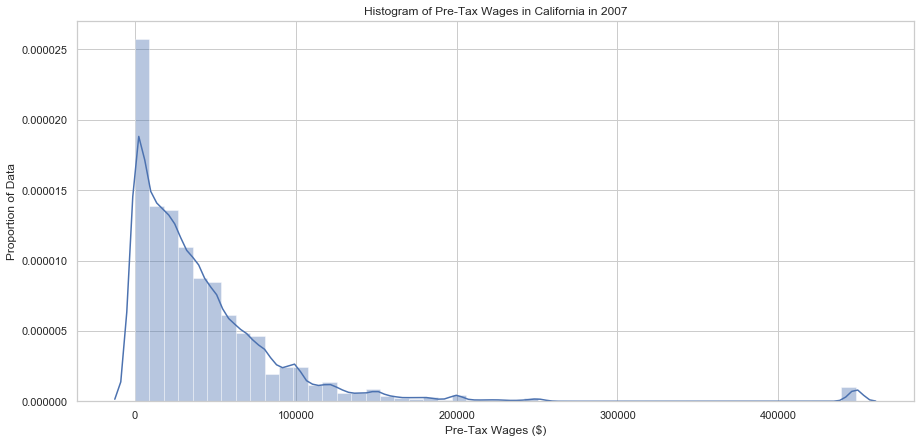

In [58]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2007['Pre-Tax Wages'], label = 'Wages in 2007')
plt.title('Histogram of Pre-Tax Wages in California in 2007')
plt.xlabel('Pre-Tax Wages ($)')
plt.ylabel('Proportion of Data');

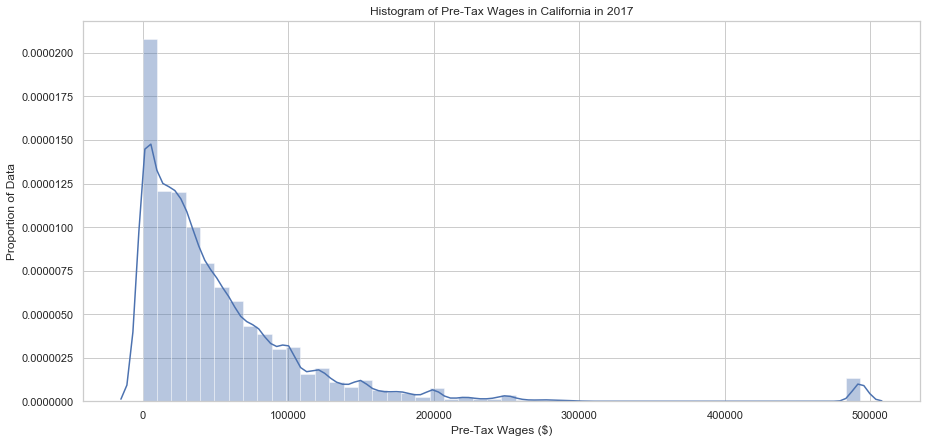

In [59]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2017['Pre-Tax Wages'], label = 'Wages in 2017')
plt.title('Histogram of Pre-Tax Wages in California in 2017')
plt.xlabel('Pre-Tax Wages ($)')
plt.ylabel('Proportion of Data');

<div class="alert alert-success">
<b> Compare these two histograms. Is there a significant difference in distribution of wages between 2007 and 2017?</b> 
</div>

##### Double click this cell and write your answer here.

One thing we may want to account for when measuring changes in dollar amounts over time is the *inflation rate*. A common way to measure this is through the Consumer Price Index, commonly denoted as the CPI. 

According to the Investopedia [2], "The CPI measures the average change in prices over time that consumers pay for a basket of goods and services, commonly known as inflation. Essentially it attempts to [...] measure the purchasing power of a country's unit of currency." 

Given that the CPI in California in 2007 was *217.424* and the CPI in California in 2017 was *262.802*, let's adjust the wages of workers in 2017 for inflation to find the *real* change in wages. 

**Run the cell below.**

<div class="alert alert-success">
<b> Use the CPI numbers above to adjust the average wage for Californian workers in 2017 for inflation. Explain how you got your answer. </b> 
</div>

##### Double click this cell and write your answer here.

*Run the cell below to check your work.*

In [60]:
cpi_2017 = 262.802
cpi_2007 = 217.424
inflation_rate = (cpi_2017 - cpi_2007)/cpi_2007 
adjust_rate = 1 + inflation_rate

print('The inflation rate from 2007 to 2017 was {}.'.format(str(np.round(inflation_rate, 4) * 100) + '%'), '\n')
print('The nominal average wage in California in 2017 was: {}'.format(dollar_formatter(average_wages_2017)), '\n')
print('The real average wage in California in 2017 was: {}'.format(dollar_formatter(average_wages_2017/adjust_rate)), '\n')
print('The real change in average wages in California between 2007 and 2017 was: {}'.format(dollar_formatter((average_wages_2017/adjust_rate) - average_wages_2007)))

The inflation rate from 2007 to 2017 was 20.87%. 

The nominal average wage in California in 2017 was: $53,806.03 

The real average wage in California in 2017 was: $44,515.35 

The real change in average wages in California between 2007 and 2017 was: $1,712.50


Great job! Now that we have gotten a taste for analyzing data and interpreting graphs, let's move on to looking at industries and occupations of workers. Note that we won't be adjusting all the dollar amounts below for inflation, so we need to keep that in mind as we do our analysis. 

### 2. Top Industries in 2007 vs. 2017

What were the top 10 industries that survey respondents worked in between 2007 and 2017? 

**Run the cell below.**

In [61]:
round((industry_2007['Industry'].value_counts(normalize = True))[0:10] * 100, 2).to_frame().rename(columns=
                                                                                                     {'Industry': 'Percentage of Workers Employed by Industry in 2007'})

,Percentage of Workers Employed by Industry in 2007
"Transportation, Warehouse",11.84
Health Care,10.86
Retail Trade,10.75
Manufacturing,10.23
Educational Services,9.16
Company Management,7.98
Accomodation and Food Services,6.15
Other services,4.89
Finance and Insurance,4.72
Public Administration,4.50


In [62]:
round((industry_2017['Industry'].value_counts(normalize = True))[0:10] * 100, 2).to_frame().rename(columns=
                                                                                                     {'Industry': 'Percentage of Workers Employed by Industry in 2017'})

,Percentage of Workers Employed by Industry in 2017
Health Care,12.40
"Transportation, Warehouse",10.93
Retail Trade,9.99
Company Management,9.56
Educational Services,9.36
Manufacturing,9.32
Accomodation and Food Services,7.01
Other services,5.09
Public Administration,4.45
Waste Management,4.38


<div class="alert alert-success">
<b> How have the top 10 industries of workers between 2007 and 2017 changed? </b> 
</div>

##### Double click this cell and write your answer here.

The top 5 industries depicted above represent the top 5 industries in all of California. Run the cell below and select the metro area nearest you or any other metro area that interests you to see the top 5 industries in that area.

In [63]:
#Joining both 2007 and 2017 tables.
industry = pd.concat([industry_2007, industry_2017])

def plot_occupations(county):
    plt.figure(figsize=(10,10));
    county_top_5 = industry[industry['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Industry',
                  hue = 'Year', order=county_top_5['Industry'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("twilight_r"))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Industries in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Industries');
    
county_widget = widgets.Dropdown(
    options=list(industry['County'].value_counts().index),
    value=list(industry['County'].value_counts().index)[0],
    description='Select Metro Area:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Select Metro Area:', options=('Los Angeles-Long Beach-Anaheim, CA'…

<div class="alert alert-success">
<b> What difference, if any, do you see in the top 5 industries in both years between California (the full dataset) and the county you selected? After reading a bit about your county’s economy, what do you think? </b> 
</div>

##### Double click this celll and write your answer here.

### 3. Top 5 Industries in 2007 and 2017
Now, let's visualize any possible changes in the top 5 occupations from 2007 to 2017.

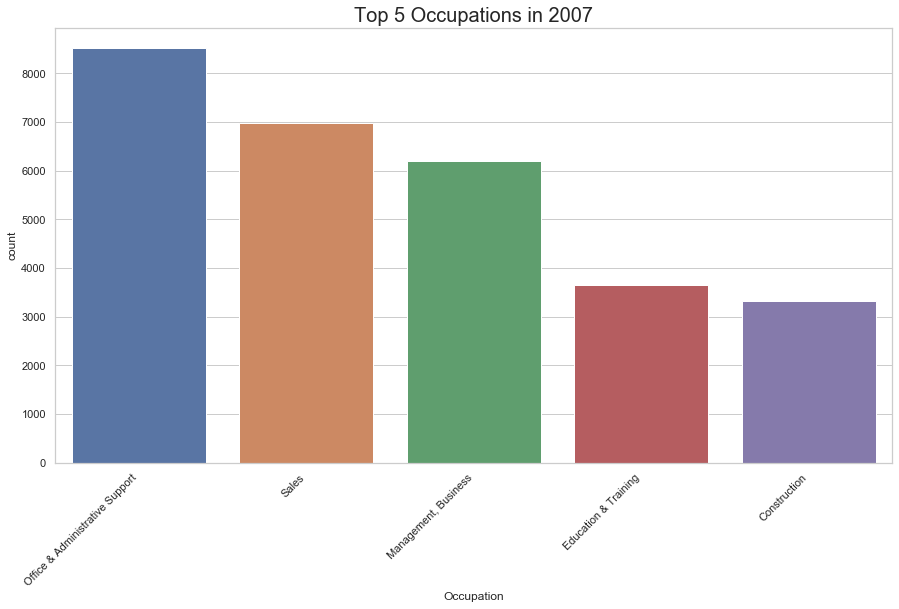

In [64]:
plt.figure(figsize=(15,8))
p = sns.countplot(data=occupation_2007,
                  x = 'Occupation',
                  order=occupation_2007['Occupation'].value_counts(sort=True).index[0:5])
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
p.set_title('Top 5 Occupations in 2007', fontdict = {'fontsize': 20});
p.set_xlabel('Occupation');

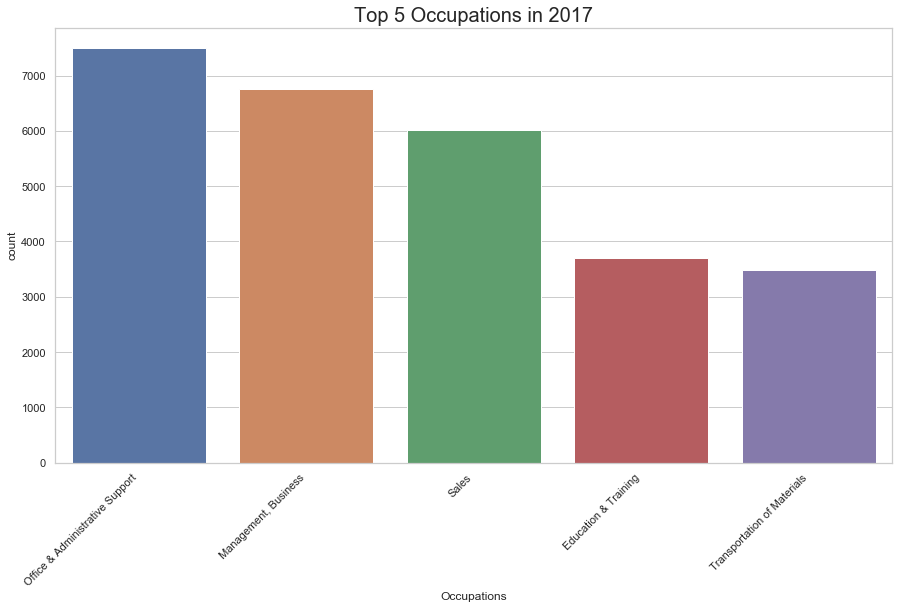

In [65]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=occupation_2017,
                  x = 'Occupation',
                   order=occupation_2017['Occupation'].value_counts(sort=True).index[0:5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 5 Occupations in 2017', fontdict = {'fontsize': 20});
ax.set_xlabel('Occupations');

Let's visualize the top 5 occupations for both years side by side.

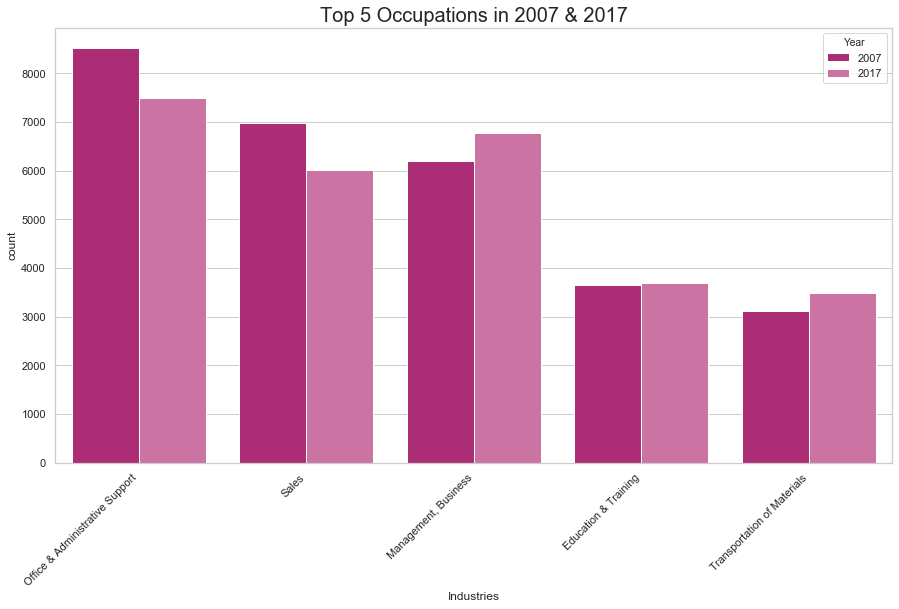

In [66]:
occupation = pd.DataFrame()
occupation = occupation.append(occupation_2007)
occupation = occupation.append(occupation_2017)
plt.figure(figsize=(15,8))
p = sns.countplot(data=occupation,
                  x = 'Occupation',
                  hue = 'Year', order=occupation['Occupation'].value_counts(sort=True).index[0:5], 
                 palette = sns.color_palette("PiYG", 10))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha="right")
p.set_title('Top 5 Occupations in 2007 & 2017', fontdict= {'fontsize' : 20});
p.set_xlabel('Industries');

<div class="alert alert-success">
<b> What changes do you see in the top 5 occupation from 2007 to 2017? If there are changes, what are the differences between 2007 and 2017? </b> 
</div>

##### Your answer here.

### Top 5 Occupations by Metro Area

Run the cell below. You should see a drop-down menu that allows youo to select one of the metro areas that our dataset contains. Pick a metro area and analyze what the top 5 occupations were in 2007 and 2017. 

In [67]:
def plot_occupations(county):
    plt.figure(figsize=(10,10));
    county_top_5 = occupation[occupation['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Occupation',
                  hue = 'Year', order=county_top_5['Occupation'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("twilight"))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Occupations in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Occupations');
    
county_widget = widgets.Dropdown(
    options=list(occupation['County'].value_counts().index),
    value=list(occupation['County'].value_counts().index)[0],
    description='Select County:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Select County:', options=('Los Angeles-Long Beach-Anaheim, CA', 'S…

<div class="alert alert-success">
<b> What difference, if any, do you see in the top 5 occupations in both years between California (the full dataset) and the county you selected? After reading a bit about your county’s economy, what do you think? </b> 
</div>

##### Your answer here.

## B) Income Distribution

For this category, we will look at distributions of income with respect to other variables. First, we will simply compare the distribution of household incomes for survey respondents. 

**Run the cells below.**

### 1. Distributions of Household Income

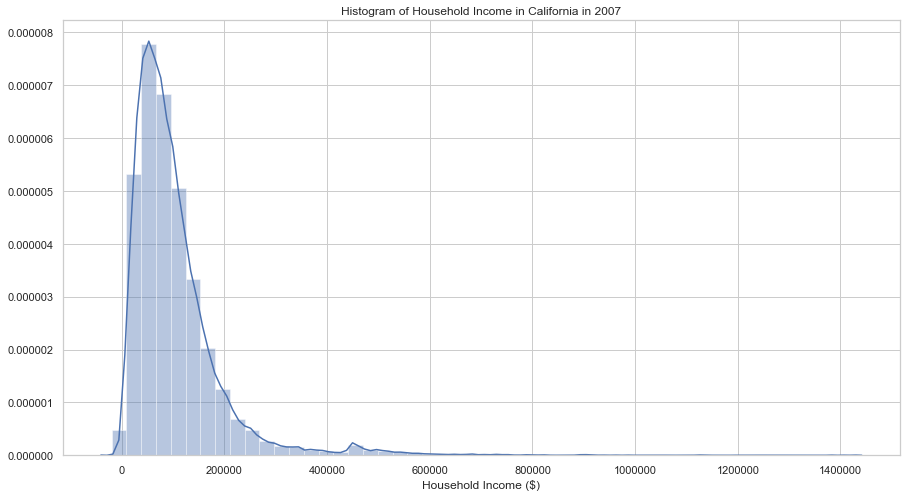

In [68]:
plt.figure(figsize=(15,8))
sns.distplot(poverty_2007['Household Income'], label = 'Income in 2007')
plt.title('Histogram of Household Income in California in 2007')
plt.xlabel('Household Income ($)');

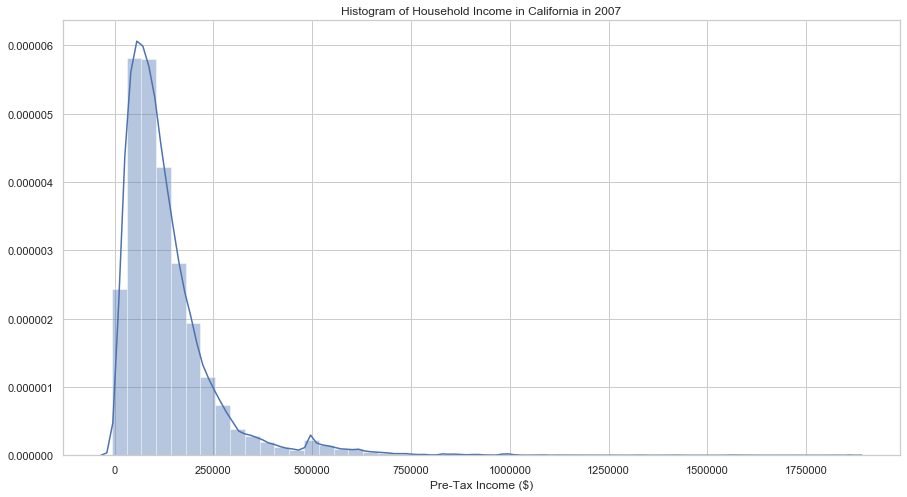

In [69]:
plt.figure(figsize=(15,8))
sns.distplot(poverty_2017['Household Income'], label = 'Income in 2017')
plt.title('Histogram of Household Income in California in 2007')
plt.xlabel('Pre-Tax Income ($)');

<div class="alert alert-success">
<b> Analyze the shapes of these histograms. How are they similar/different? Compare them with their respective histogram for wages, which we generated earlier. Are there any differences? Why might these differences arise? </b> 
</div>

##### Double click this cell and write your answer here. 

### 2. Statistics 

Over the past decade, the issue of income inequality has increasingly manifested, across the United States. Let's see if our dataset can provide evidence for this claim. 

Specifically, let's test if the gap between bottom and top percentile incomes have increased or decreased over a span of a decade. 

**Run the cell below. **

In [70]:
first_2007 = np.percentile(poverty_2007['Household Income'], 1)
tenth_2007 = np.percentile(poverty_2007['Household Income'], 10)
twenty_fifth_2007 = np.percentile(poverty_2007['Household Income'], 25)
seventy_fifth_2007 = np.percentile(poverty_2007['Household Income'], 75)
ninety_2007 = np.percentile(poverty_2007['Household Income'], 90)
ninety_ninth_2007 = np.percentile(poverty_2007['Household Income'], 99)
diff_1 = float(np.round(seventy_fifth_2007 - twenty_fifth_2007, 2))
diff_2 = float(np.round(ninety_2007 - tenth_2007, 2))
diff_3 = float(np.round(ninety_ninth_2007 - first_2007, 2))
print("The gap between the 75th and 25th percentile income is: {}".format(dollar_formatter(diff_1)))
print("The gap between the 10th and 90th percentile income is: {}".format(dollar_formatter(diff_2)))
print("The gap between the 1st and 99th percentile income is: {}".format(dollar_formatter(diff_3)))

The gap between the 75th and 25th percentile income is: $79,900.00
The gap between the 10th and 90th percentile income is: $162,200.00
The gap between the 1st and 99th percentile income is: $489,900.00


In [71]:
first_2017 = np.percentile(poverty_2017['Household Income'], 1)
tenth_2017 = np.percentile(poverty_2017['Household Income'], 10)
twenty_fifth_2017 = np.percentile(poverty_2017['Household Income'], 25)
seventy_fifth_2017 = np.percentile(poverty_2017['Household Income'], 75)
ninety_2017 = np.percentile(poverty_2017['Household Income'], 90)
ninety_ninth_2017 = np.percentile(poverty_2017['Household Income'], 99)
diff_1 = float(np.round(seventy_fifth_2017 - twenty_fifth_2017, 2))
diff_2 = float(np.round(ninety_2017 - tenth_2017, 2))
diff_3 = float(np.round(ninety_ninth_2017 - first_2017, 2))
print("The gap between the 75th and 25th percentile income is: {}".format(dollar_formatter(diff_1)))
print("The gap between the 10th and 90th percentile income is: {}".format(dollar_formatter(diff_2)))
print("The gap between the 1st and 99th percentile income is: {}".format(dollar_formatter(diff_3)))

The gap between the 75th and 25th percentile income is: $105,900.00
The gap between the 10th and 90th percentile income is: $218,000.00
The gap between the 1st and 99th percentile income is: $600,020.00


<div class="alert alert-success">
<b> Compare these statistics. Can we say that there has been a definite increase in income inequality from 2007 to 2017? Why might these numbers be misleading? </b> 
</div>

##### Double click this cell and write your answer here.

### 3. Income by City

In [72]:
income_by_city = poverty_2007.groupby('City').mean()[['Household Income']].sort_values('Household Income')
income_by_city.head(5)

,Household Income
City,
"East Los Angeles, CA",62645.000000
"El Monte, CA",65202.715232
"San Bernardino, CA",65910.115385
"Fresno, CA",71972.376662
"Ontario, CA",76019.537383


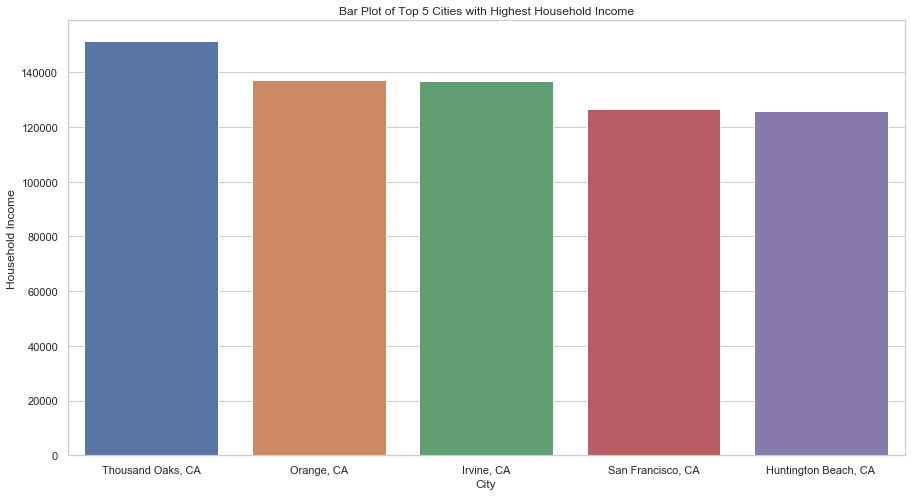

In [73]:
plt.figure(figsize = (15, 8))
top_5_income_by_city = income_by_city.sort_values('Household Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = top_5_income_by_city)
plt.title('Bar Plot of Top 5 Cities with Highest Household Income');

<div class="alert alert-success">
<b> Do some research into these cities. How may they be related and why might that explain their presence in the highest average incomes in California?</b> 
</div>

##### Double click this cell and write your answer here.

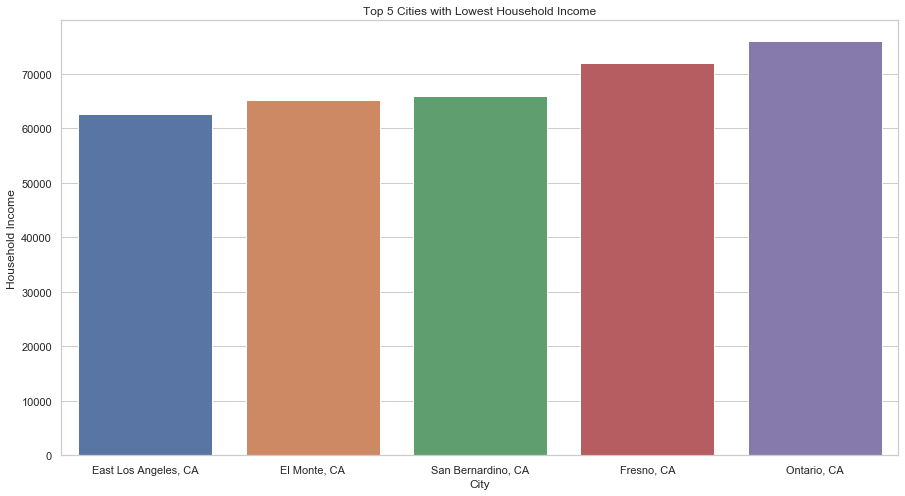

In [74]:
plt.figure(figsize = (15, 8))
bottom_5_income_by_city = income_by_city.sort_values('Household Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = bottom_5_income_by_city)
plt.title('Top 5 Cities with Lowest Household Income');

<div class="alert alert-success">
<b> Do some research into these cities. How may they be related and why might that explain their presence in the lowest average incomes in California?</b> 
</div>

##### Double click this cell and write your answer here. 

Finally, let's examine how the lowest and higest household income cities have changed over a span of a decade.

**Run the cells below.**

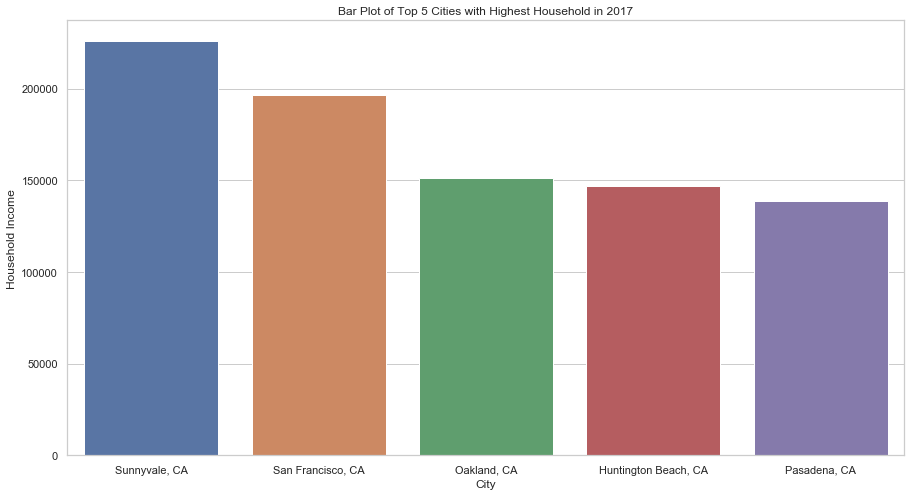

In [75]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Household Income']].sort_values('Household Income')
top_5_income_by_city_2017 = income_by_city_2017.sort_values('Household Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = top_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Highest Household in 2017');

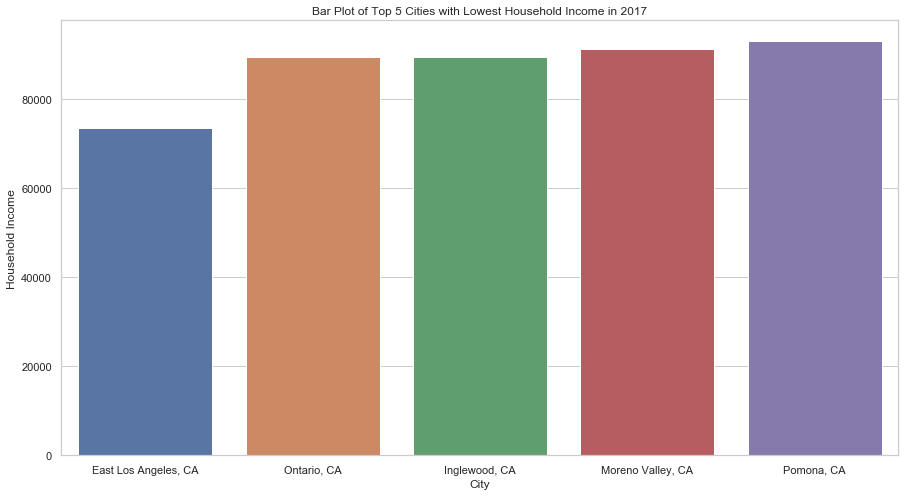

In [76]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Household Income']].sort_values('Household Income')
bottom_5_income_by_city_2017 = income_by_city_2017.sort_values('Household Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = bottom_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Lowest Household Income in 2017');

<div class="alert alert-success">
<b> Write down any observations you have about these cities' placements, as well as how they have changed? Does income inequality have some geographical component?</b> 
</div>

##### Double click this cell and write your answer here.

### 4. Wage by Type of Worker 

In [77]:
tow_inc_2007 = poverty_2007.groupby('Type of Worker').mean()[['Pre-Tax Wages']]
tow_inc_2007

,Pre-Tax Wages
Type of Worker,
Self-employed,28387.291855
Works for wages,44653.286152


In [78]:
tow_inc_2017 = poverty_2017.groupby('Type of Worker').mean()[['Pre-Tax Wages']]
tow_inc_2017

,Pre-Tax Wages
Type of Worker,
Self-employed,32999.731490
Works for wages,57738.531214


### 5. Wage by Ownership Status

In [79]:
own_inc_2007 = poverty_2007.groupby('Ownership Status').mean()[['Pre-Tax Wages']]
own_inc_2007

,Pre-Tax Wages
Ownership Status,
Owned or being bought (loan),48559.212228
Rented,30882.163446


In [80]:
own_inc_2017 = poverty_2017.groupby('Ownership Status').mean()[['Pre-Tax Wages']]
own_inc_2017

,Pre-Tax Wages
Ownership Status,
Owned or being bought (loan),63337.893646
Rented,41418.919053


In [81]:
own_inc_2007 = poverty_2007.groupby(['Ownership Status', 'City']).mean()[['Pre-Tax Wages']]
own_inc_2007.head(3)

Pre-Tax Wages
Ownership Status             City                          
Owned or being bought (loan) Anaheim, CA       42038.929577
                             Bakersfield, CA   41499.002770
                             Burbank, CA       49702.250000

In [82]:
own_inc_2017 = poverty_2017.groupby(['Ownership Status', 'City']).mean()[['Pre-Tax Wages']]
own_inc_2017.head(3)

Pre-Tax Wages
Ownership Status             City                               
Owned or being bought (loan) Antioch, CA            50992.708333
                             Downey, CA             55994.505495
                             East Los Angeles, CA   37656.527778

### 6. Wage by Race

In [83]:
race_inc_2007 = poverty_2007.groupby('Race').mean()[['Pre-Tax Wages']]
race_inc_2007

,Pre-Tax Wages
Race,
African American,38385.866765
American Indian or Alaska Native,32305.215517
Asian/Pacific Islander,46692.817375
Other,26490.941148
Two or more races,32333.032887
White,45931.056968


In [84]:
race_inc_2017 = poverty_2017.groupby('Race').mean()[['Pre-Tax Wages']]
race_inc_2017

,Pre-Tax Wages
Race,
African American,44863.374280
American Indian or Alaska Native,35782.371917
Asian/Pacific Islander,63960.118896
Other,31423.820988
Two or more races,49806.710695
White,58020.355913


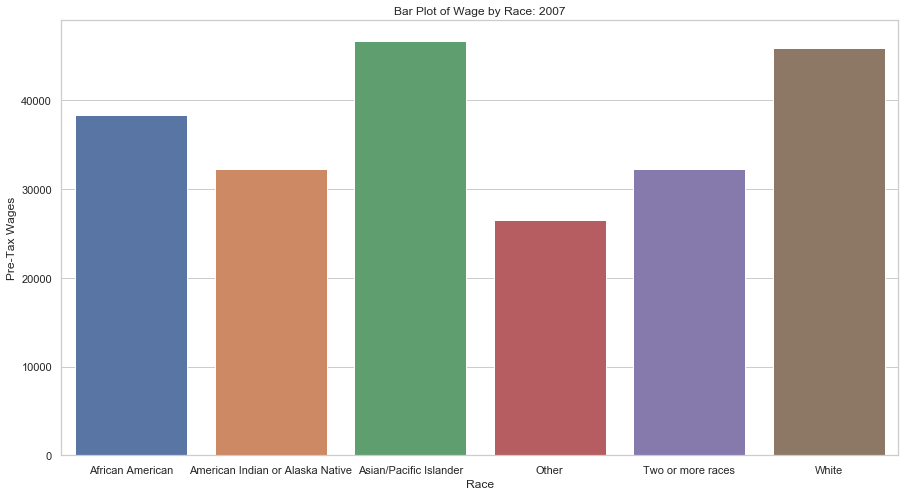

In [85]:
plt.figure(figsize = (15, 8))
race_income_2007 = race_inc_2007.reset_index()
sns.barplot(x = 'Race', y = 'Pre-Tax Wages', data = race_income_2007)
plt.title('Bar Plot of Wage by Race: 2007');

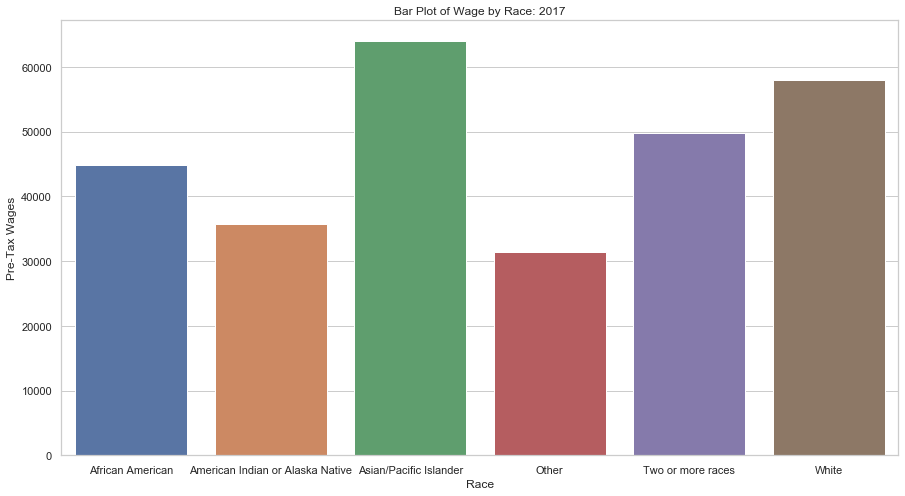

In [86]:
plt.figure(figsize = (15, 8))
race_income_2017 = race_inc_2017.reset_index()
sns.barplot(x = 'Race', y = 'Pre-Tax Wages', data = race_income_2017)
plt.title('Bar Plot of Wage by Race: 2017');

## C) Education level 

Simply run the cell below to load the education datasets.

In [87]:
education_seven = pd.read_csv('education_2007.csv', dtype={'Hours worked per week': int})
education_seventeen = pd.read_csv('education_2017.csv', dtype={'Hours worked per week': int})
education = pd.concat([education_seven, education_seventeen])

### 1. Education and Income

Our dataset contains two columns for income: `Household Income` (measured for the entire household) and `Personal Pre-Tax Income`. For our purposes, we will be focusing on `Personal Pre-Tax Income`. The graph below maps out the total income received based on education level. The education levels can be seen in the x-axis, while the y-axis represents the total income. 

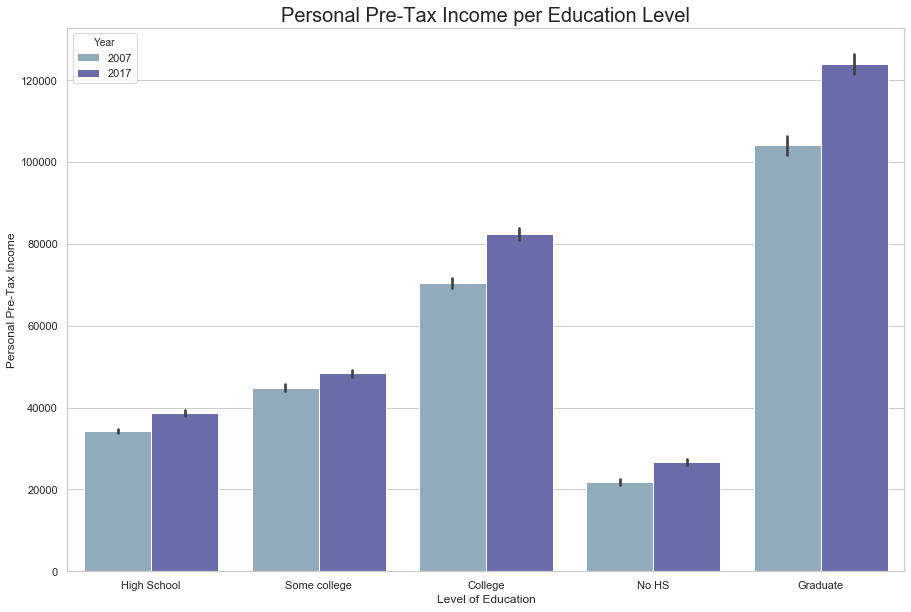

In [88]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Education Status', y='Personal Pre-Tax Income', 
                 hue='Year', data=education, 
                palette = sns.color_palette("twilight"))
ax.set_xlabel('Level of Education')
ax.set_ylabel('Personal Pre-Tax Income')
ax.set_title('Personal Pre-Tax Income per Education Level', fontdict={'fontsize': 20});

[Click this link to access the Family Needs Calculator](https://insightcced.org/2018-family-needs-calculator/)
<div class="alert alert-success">
<b> How do the incomes you see here compare to our discussion about self-sufficiency incomes? Click the link above to acess an online Family Needs Calculator. What are some interpretations you can make from this chart?
 </b> 
</div>

##### Your answer here.

### 2. Types of Workers

Our dataset also tells us whether a person was self-employed or working for wages under an employer. Let's try to to find out what the average level of education is within self-employed workers.

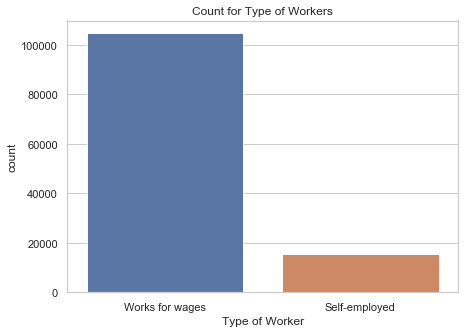

In [89]:
plt.figure(figsize=(7, 5))
sns.countplot(education['Type of Worker']);
plt.title('Count for Type of Workers');

This countplot visualizes the amount of workers who are employed and the amount of workers who are self-employed in our dataset. We can see that there is significantly less self-employed workers. Now let's analyze what their education level is. 

The following graphs are called violin plots. They help us visualize the distribution for a given category. [Read more here](https://mode.com/blog/violin-plot-examples) if you are interested in learning more about violin plots. For now, we will use violin plots in order to help us visualize the distribution in personal income based on education level for self-employed and employed workers.

<img src="https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png" style="width:300px;height:300px;"/>

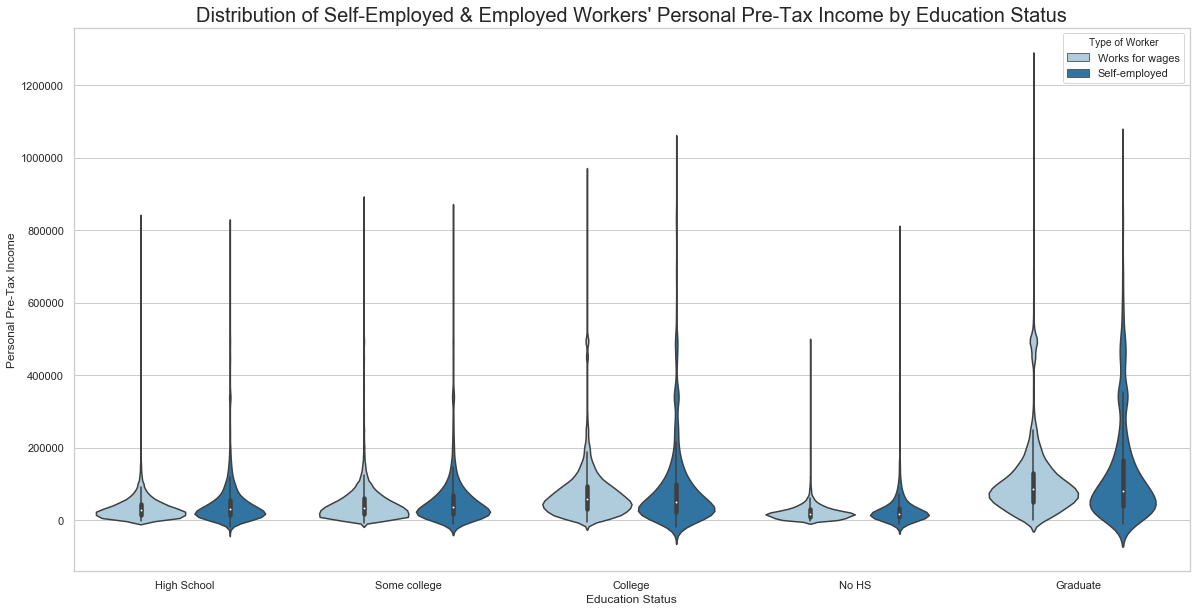

In [90]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Education Status', y='Personal Pre-Tax Income', 
              data=education, hue='Type of Worker', palette=sns.color_palette("Paired"))
plt.title("Distribution of Self-Employed & Employed Workers' Personal Pre-Tax Income by Education Status", 
          fontdict={'fontsize': 20});

The long tail in our violin plots mean that there are some people whose income reached those values. For example, for those self-employed workers who completed college, we can see that the tail of our violin plot reaches above 100,000. This means that there are some self-employed workers who completed college and are at or above an income of 100K. However, since this violin plot has most of its mass within the 0-20k income range, this scenario is not very likely, as the distribution of income is mostly found within the 0-20K range. 


<div class="alert alert-success">
<b>What conclusions can you draw about the role of education and employment status in determining  income based on these plots?</b>
    </div>

##### Your answer here.

### 3. Race

How are race and level of education related?

In [91]:
education_race = pd.crosstab(education['Race'],education['Education Status'], normalize='index') * 100
education_race

Education Status,College,Graduate,High School,No HS,Some college
Race,,,,,
African American,17.839669,10.801656,33.835152,4.309371,33.214151
American Indian or Alaska Native,9.609895,5.423406,42.055186,13.796384,29.115128
Asian/Pacific Islander,34.681644,20.316466,18.852946,5.594859,20.554085
Other,8.188266,2.611219,39.954868,28.394584,20.851064
Two or more races,22.354130,10.608740,29.931801,8.588027,28.517302
White,23.127057,14.626601,27.735547,9.211692,25.299102


<Figure size 720x1080 with 0 Axes>

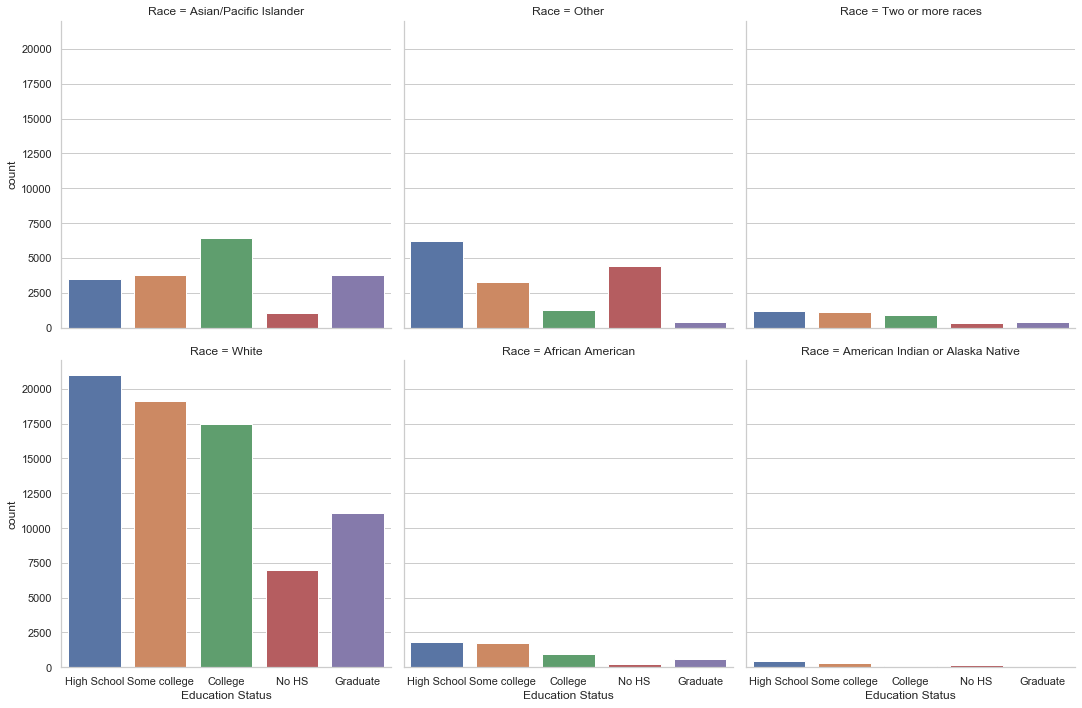

In [92]:
plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Race', 
            data=education, kind='count', col_wrap=3, orient="h");

<div class="alert alert-success">
<b>   What conclusions can you draw about the relationship between race and education based on these charts?</b> 
</div>

##### Your answer here.

Our dataset contains a separate column for Hispanic-identifying individuals. We can display the same visualization for those in each category in the `Hispanic` column. 

<Figure size 720x1080 with 0 Axes>

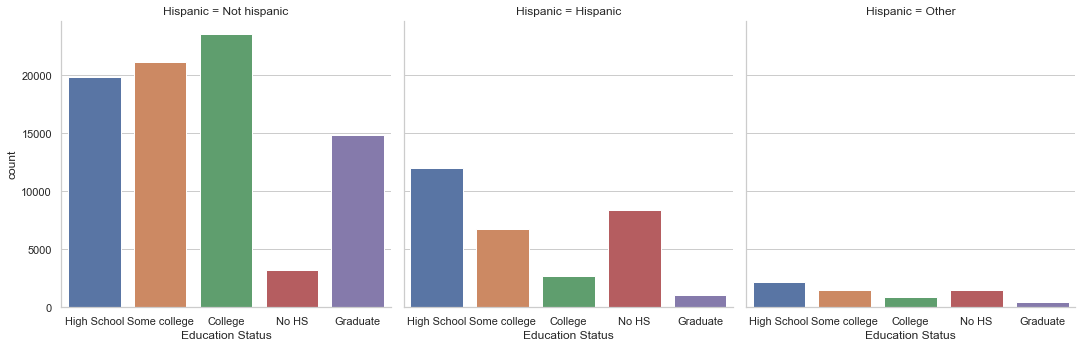

In [93]:
plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Hispanic', 
            data=education, kind='count', col_wrap=3, orient="h");

<div class="alert alert-success">
<b> Are the results any different from the ones above? If so, what are the differences? </b> 
</div>

##### Your answer here.

## D) Indicators of poverty

What are the indicators of poverty? What relationship does poverty have with the other features (columns) in our dataset?

In [94]:
poverty_seven = pd.read_csv('poverty_2007.csv')
poverty_seventeen = pd.read_csv('poverty_2017.csv')
poverty = pd.concat([poverty_seven, poverty_seventeen])
poverty.replace(to_replace='99 (Topcode)', value=90, inplace=True)
poverty['Hours worked per week'] = poverty['Hours worked per week'].astype(int)

### Employment Status

For poverty, our data categorizes an individual into one of three categories: `Near Poverty`, `Non-Poverty`, and `Poverty`. We will be looking at those who are in `Poverty` or `Near Poverty`.

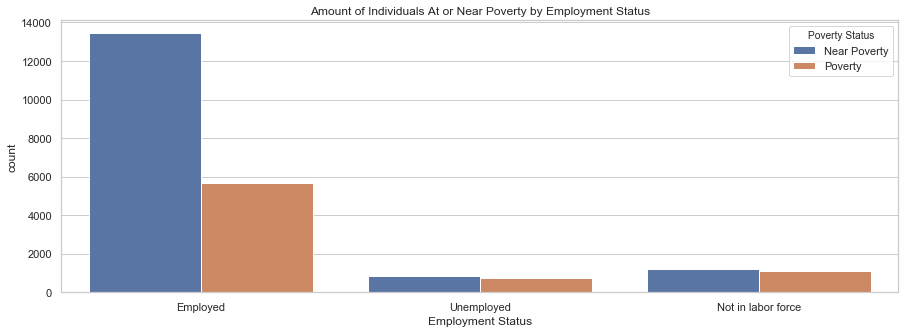

In [95]:
plt.figure(figsize=(15, 5))
all_poverty = poverty[(poverty['Poverty Status'] == 'Poverty') | (poverty['Poverty Status'] == 'Near Poverty')]
sns.countplot(x='Employment Status', data=all_poverty, hue='Poverty Status')
plt.title('Amount of Individuals At or Near Poverty by Employment Status');

### Occupations in High-Poverty Areas

What are the top 5 occupations for people in poverty? Run the cell below, it should output the top 5 industries for those at OR near poverty.

In [96]:
j = 1
for i in occupation[(occupation['Poverty Status'] == 'Poverty') | 
                    (occupation['Poverty Status'] == 'Near Poverty')]['Occupation'].value_counts(
    sort=True).index[0:5]:
    print(j, 'Top Occupation:', i)
    j +=1

1 Top Occupation: Office & Administrative Support
2 Top Occupation: Sales
3 Top Occupation: Food Preparation
4 Top Occupation: Transportation of Materials
5 Top Occupation: Building & Grounds Cleaning


<div class="alert alert-success">
<b> What are the top 5 occupations for members in poverty? </b> 
</div>

##### Your answer here.

## Bibliography <a id = 'section7'></a>

• https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html

• https://www.investopedia.com/terms/c/consumerpriceindex.asp

• https://en.wikipedia.org/wiki/Stratified_sampling

• (TBD)

___
### Sidenotes:
[1]: Since the size of the original dataset was too large, we are using Stratified Random Samples instead. Refer to the link in the bibliography for more information on our sampling approach. 

___
### Getting extra help

Interested in getting help with learning Python or applying computational analysis? Check out  [Data Peer Consulting](https://data.berkeley.edu/education/data-peer-consulting) in Moffitt library for drop-in, one-on-one questions. For additional workshops designed for people new to computational analysis, take a look at the workshops at [The Dlab](https://dlab.berkeley.edu) (free for Berkeley students!). 

Best  luck!

------------------------------------------------------------------------------------------------------------------------

### Feedback:
Please let us know your thoughts on this notebook!

Fill out the survey at this link: https://docs.google.com/forms/d/e/1FAIpQLSfahkYSKqlEEfC6WMKlaqeIxRVj0r7T4N5lgBf9bRVwRG58wQ/viewform

------------------------------------------------------------------------------------------------------------------------
Notebook developed by: Ritvik Iyer, Carlos Calderon

Data Science Modules: http://data.berkeley.edu/education/modules